<style>
    .background {
        background-image: ![image.png](attachment:76246d0b-e431-4a6b-add9-66d0f6ddd65e.png); /* Using attachment reference */
        background-size: cover; /* Cover the entire cell */
        position: relative;
        height: 100vh; /* Full height */
        width: 100%; /* Full width */
        color: white; /* Text color */
        padding: 20px; /* Add some padding */
        font-family: 'Arial', sans-serif; /* Change font family */
    }
    .overlay {
        background-color: rgba(0, 0, 0, 0.5); /* Dark overlay for better readability */
        position: absolute;
        top: 0;
        left: 0;
        right: 0;
        bottom: 0;
    }
    h1, h3, p {
        position: relative; /* Allow text to be above overlay */
        z-index: 1; /* Ensure text appears above the overlay */
    }
</style>




<div align="center" style="
     background-color: #e6f2ff; 
     padding: 30px; 
     border-radius: 15px; 
     box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);
     font-family: Arial, sans-serif;">

  <h1 style="color: #004080; font-size: 2.5em; margin-bottom: 10px;">Welcome to United Airlines Call Center Data Analysis</h1>
  
  <h2 style="color: #0059b3; font-size: 2em; margin-bottom: 15px;">Exploring Insights and Improvements</h2>
  
  <h3 style="color: #0073e6; font-size: 1.5em; margin-bottom: 25px;">
     This notebook showcases the analysis of call center metrics and proposes enhancements to the IVR system
  </h3>

  <h1 style="color: #004080; font-size: 2em;">Team: Two Neurons</h1>
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images/united_airlines.jpg
/kaggle/input/dataset/sentiment_statisticscc1e57a.csv
/kaggle/input/dataset/customers2afd6ea.csv
/kaggle/input/dataset/testbc7185d.csv
/kaggle/input/dataset/callsf0d4f5a.csv
/kaggle/input/dataset/reason18315ff.csv


In [2]:
calls = pd.read_csv("/kaggle/input/dataset/callsf0d4f5a.csv")
customers = pd.read_csv("/kaggle/input/dataset/customers2afd6ea.csv")
reason = pd.read_csv("/kaggle/input/dataset/reason18315ff.csv")
sentiments = pd.read_csv("/kaggle/input/dataset/sentiment_statisticscc1e57a.csv")
test = pd.read_csv("/kaggle/input/dataset/testbc7185d.csv")

In [3]:
calls

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...


In [4]:
customers

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,NaN
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,NaN
71808,8095620266,Christine Oneal,1.0


In [5]:
customers.describe()

,customer_id,elite_level_code
count,7.181000e+04,46043.000000
mean,5.004334e+09,1.370871
std,2.884255e+09,1.322297
min,1.197800e+04,0.000000
25%,2.514618e+09,0.000000
50%,4.999664e+09,1.000000
75%,7.509126e+09,2.000000
max,9.999935e+09,5.000000


In [6]:
reason

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post Flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


In [7]:
sentiments

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34
71806,8865997781,980156,calm,frustrated,0.03,0.22
71807,8019240181,616988,calm,polite,0.05,0.42
71808,8332067080,161354,neutral,polite,-0.07,0.13


In [8]:
merged = pd.merge(calls, customers, on='customer_id')

In [9]:
merged

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0
...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,Dennis Singleton DDS,NaN
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,Paul Mitchell,1.0
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,Kaylee Lang,NaN
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...,Christine Oneal,1.0


In [10]:
test

,call_id
0,7732610078
1,2400299738
2,6533095063
3,7774450920
4,9214147168
...,...
5152,5300201106
5153,727694488
5154,147487837
5155,5330794838


# master =  calls + customers + sentiments

In [11]:
sentiments = sentiments.drop(columns=['agent_id'])
master = pd.merge(merged, sentiments, on='call_id')

In [12]:
master

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,Dennis Singleton DDS,NaN,calm,calm,0.05,0.34
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,Paul Mitchell,1.0,calm,frustrated,0.03,0.22
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,Kaylee Lang,NaN,calm,polite,0.05,0.42
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...,Christine Oneal,1.0,neutral,polite,-0.07,0.13


In [13]:
master.describe()

,call_id,customer_id,agent_id,elite_level_code,average_sentiment,silence_percent_average
count,7.181000e+04,7.181000e+04,71810.000000,46043.000000,71701.000000,71810.000000
mean,4.993574e+09,5.004334e+09,564768.278039,1.370871,-0.033519,0.285515
std,2.889673e+09,2.884255e+09,257532.362167,1.322297,0.143715,0.192031
min,1.316420e+05,1.197800e+04,102574.000000,0.000000,-1.380000,0.000000
25%,2.480013e+09,2.514618e+09,347606.000000,0.000000,-0.110000,0.130000
50%,4.989448e+09,4.999664e+09,591778.000000,1.000000,-0.020000,0.260000
75%,7.493629e+09,7.509126e+09,786323.000000,2.000000,0.050000,0.410000
max,9.999806e+09,9.999935e+09,993862.000000,5.000000,2.670000,0.980000


# master_filtered = master - test

In [14]:
master_filtered = master[~master['call_id'].isin(test['call_id'])]

In [15]:
master_filtered

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71804,7569738090,7367304988,783441,8/31/2024 23:51,8/31/2024 23:57,9/1/2024 0:07,\n\nAgent: Thank you for calling United Airlin...,Kevin Warner,2.0,neutral,frustrated,-0.19,0.51
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,Dennis Singleton DDS,NaN,calm,calm,0.05,0.34
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,Paul Mitchell,1.0,calm,frustrated,0.03,0.22
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,Kaylee Lang,NaN,calm,polite,0.05,0.42


# final = calls + customers + sentiments + reason

In [16]:
final = pd.merge(master_filtered, reason, on='call_id')

In [17]:
final['call_start_datetime'].unique()

array(['7/31/2024 23:56', '8/1/2024 0:03', '7/31/2024 23:59', ...,
       '8/31/2024 23:55', '8/31/2024 23:52', '8/31/2024 23:49'],
      dtype=object)

In [18]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  66653 non-null  int64  
 1   customer_id              66653 non-null  int64  
 2   agent_id                 66653 non-null  int64  
 3   call_start_datetime      66653 non-null  object 
 4   agent_assigned_datetime  66653 non-null  object 
 5   call_end_datetime        66653 non-null  object 
 6   call_transcript          66653 non-null  object 
 7   customer_name            66653 non-null  object 
 8   elite_level_code         42694 non-null  float64
 9   agent_tone               66455 non-null  object 
 10  customer_tone            66653 non-null  object 
 11  average_sentiment        66552 non-null  float64
 12  silence_percent_average  66653 non-null  float64
 13  primary_call_reason      66653 non-null  object 
dtypes: float64(3), int64(3

In [19]:
final

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,neutral,angry,-0.04,0.39,Voluntary Cancel
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,calm,neutral,0.02,0.35,Booking
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,neutral,polite,-0.13,0.32,IRROPS
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,neutral,frustrated,-0.20,0.20,Upgrade
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,neutral,polite,-0.05,0.35,Seating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,8/31/2024 23:51,8/31/2024 23:57,9/1/2024 0:07,\n\nAgent: Thank you for calling United Airlin...,Kevin Warner,2.0,neutral,frustrated,-0.19,0.51,Mileage Plus
66649,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,Dennis Singleton DDS,NaN,calm,calm,0.05,0.34,Post Flight
66650,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,Paul Mitchell,1.0,calm,frustrated,0.03,0.22,Upgrade
66651,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,Kaylee Lang,NaN,calm,polite,0.05,0.42,Upgrade


In [20]:
ab = final['primary_call_reason'].isna().sum()
ab

0

In [21]:
final = final.drop('customer_name', axis=1)

In [22]:
final

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,4.0,neutral,angry,-0.04,0.39,Voluntary Cancel
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,NaN,calm,neutral,0.02,0.35,Booking
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,NaN,neutral,polite,-0.13,0.32,IRROPS
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,2.0,neutral,frustrated,-0.20,0.20,Upgrade
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,0.0,neutral,polite,-0.05,0.35,Seating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,8/31/2024 23:51,8/31/2024 23:57,9/1/2024 0:07,\n\nAgent: Thank you for calling United Airlin...,2.0,neutral,frustrated,-0.19,0.51,Mileage Plus
66649,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,NaN,calm,calm,0.05,0.34,Post Flight
66650,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,1.0,calm,frustrated,0.03,0.22,Upgrade
66651,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,NaN,calm,polite,0.05,0.42,Upgrade


## Calculating Waiting & Handling Time

In [23]:
# Convert columns to datetime
final['call_start_datetime'] = pd.to_datetime(final['call_start_datetime'])
final['agent_assigned_datetime'] = pd.to_datetime(final['agent_assigned_datetime'])
final['call_end_datetime'] = pd.to_datetime(final['call_end_datetime'])

# Calculate waiting_time as difference between agent_assigned_datetime and call_start_datetime
final['waiting_time'] = (final['agent_assigned_datetime'] - final['call_start_datetime']).dt.total_seconds() / 60  # in minutes

# Calculate handle_time as difference between call_end_datetime and agent_assigned_datetime
final['handle_time'] = (final['call_end_datetime'] - final['agent_assigned_datetime']).dt.total_seconds() / 60  # in minutes

# Display the result
print(final[['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime', 'waiting_time', 'handle_time']].head())


  call_start_datetime agent_assigned_datetime   call_end_datetime  \
0 2024-07-31 23:56:00     2024-08-01 00:03:00 2024-08-01 00:34:00   
1 2024-08-01 00:03:00     2024-08-01 00:06:00 2024-08-01 00:18:00   
2 2024-07-31 23:59:00     2024-08-01 00:07:00 2024-08-01 00:26:00   
3 2024-08-01 00:05:00     2024-08-01 00:10:00 2024-08-01 00:17:00   
4 2024-08-01 00:04:00     2024-08-01 00:14:00 2024-08-01 00:23:00   

   waiting_time  handle_time  
0           7.0         31.0  
1           3.0         12.0  
2           8.0         19.0  
3           5.0          7.0  
4          10.0          9.0  


In [24]:
final.head(10)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,waiting_time,handle_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,4.0,neutral,angry,-0.04,0.39,Voluntary Cancel,7.0,31.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,NaN,calm,neutral,0.02,0.35,Booking,3.0,12.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,NaN,neutral,polite,-0.13,0.32,IRROPS,8.0,19.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,2.0,neutral,frustrated,-0.20,0.20,Upgrade,5.0,7.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0.0,neutral,polite,-0.05,0.35,Seating,10.0,9.0
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,5.0,calm,calm,0.10,0.11,Mileage Plus,5.0,24.0
6,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,NaN,neutral,frustrated,0.00,0.25,Checkout,13.0,13.0
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,2.0,calm,angry,0.11,0.35,Mileage Plus,8.0,8.0
8,7222687732,8023417234,957331,2024-08-01 00:14:00,2024-08-01 00:22:00,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,1.0,calm,neutral,0.06,0.54,Mileage Plus,8.0,13.0
9,4113684017,1528835057,158319,2024-08-01 00:20:00,2024-08-01 00:28:00,2024-08-01 00:37:00,\n\nAgent: Thank you for calling United Airlin...,NaN,neutral,angry,-0.19,0.29,IRROPS,8.0,9.0


In [25]:
# final.to_csv('final_output.csv', index=False)  

# cleaning primary_call_reasons

In [26]:

final['primary_call_reason'] = (
    final['primary_call_reason']
    .str.replace(r'\s{2,}', ' ', regex=True)  # Replace more than two spaces with one space
    .str.replace(r'-', ' ', regex=True)      # Replace hyphen with one space
    .str.replace(r'&', 'and', regex=True)     # Replace '&' with 'and'
    .str.strip()                               # Remove leading and trailing spaces
)


In [27]:
final['primary_call_reason'].unique()

array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post Flight',
       'Check In', 'Other Topics', 'Communications', 'Schedule Change',
       'Products and Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC'],
      dtype=object)

# Normalizing average_sentiments

In [28]:
min_val = final['average_sentiment'].min()  # This should give -1.38
max_val = final['average_sentiment'].max()  # This should give 2.67

# Normalize the average_sentiment column
final['average_sentiment'] = (final['average_sentiment'] - min_val) / (max_val - min_val)


In [29]:
final

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,waiting_time,handle_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,4.0,neutral,angry,0.330864,0.39,Voluntary Cancel,7.0,31.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,NaN,calm,neutral,0.345679,0.35,Booking,3.0,12.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,NaN,neutral,polite,0.308642,0.32,IRROPS,8.0,19.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,2.0,neutral,frustrated,0.291358,0.20,Upgrade,5.0,7.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0.0,neutral,polite,0.328395,0.35,Seating,10.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,2.0,neutral,frustrated,0.293827,0.51,Mileage Plus,6.0,10.0
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,NaN,calm,calm,0.353086,0.34,Post Flight,9.0,28.0
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,1.0,calm,frustrated,0.348148,0.22,Upgrade,3.0,8.0
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,NaN,calm,polite,0.353086,0.42,Upgrade,6.0,6.0


In [30]:
final['customer_tone'].unique()

array(['angry', 'neutral', 'polite', 'frustrated', 'calm'], dtype=object)

# tone mapping-> polite & calm = 1, neutral = 0, angry & frustrated = -1

In [31]:
tone_mapping = {
    'polite': 1,
    'calm': 1,
    'neutral': 0,
    'frustrated': -1,
    'angry': -1
}

# Map the agent_tone and customer_tone to numerical values
final['agent_tone_mapped'] = final['agent_tone'].map(tone_mapping)
final['customer_tone_mapped'] = final['customer_tone'].map(tone_mapping)

# Drop the original tone columns if no longer needed
final.drop('agent_tone', axis=1, inplace=True)
final.drop('customer_tone', axis=1, inplace=True)


In [32]:
final

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,elite_level_code,average_sentiment,silence_percent_average,primary_call_reason,waiting_time,handle_time,agent_tone_mapped,customer_tone_mapped
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,4.0,0.330864,0.39,Voluntary Cancel,7.0,31.0,0.0,-1
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,NaN,0.345679,0.35,Booking,3.0,12.0,1.0,0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,NaN,0.308642,0.32,IRROPS,8.0,19.0,0.0,1
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,2.0,0.291358,0.20,Upgrade,5.0,7.0,0.0,-1
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0.328395,0.35,Seating,10.0,9.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,2.0,0.293827,0.51,Mileage Plus,6.0,10.0,0.0,-1
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,NaN,0.353086,0.34,Post Flight,9.0,28.0,1.0,1
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,1.0,0.348148,0.22,Upgrade,3.0,8.0,1.0,-1
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,NaN,0.353086,0.42,Upgrade,6.0,6.0,1.0,1


In [33]:
ab = final['agent_tone_mapped']==-1

In [34]:
ab.sum()

3804

### dropping columns

In [35]:
# final.drop('call_start_datetime', axis=1, inplace=True)
# final.drop('call_end_datetime', axis=1, inplace=True)
# final.drop('agent_assigned_datetime', axis=1, inplace=True)

# imputed the NaN values in the agent_tone_mapped column with the mode of calls made by each specific agent

In [36]:
final['agent_tone_mapped'].isna().sum()

198

In [37]:
mode_mapping = final.groupby('agent_id')['agent_tone_mapped'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

def impute_agent_tone(row):
    if pd.isna(row['agent_tone_mapped']):
        return mode_mapping.get(row['agent_id'])  # Replace with the mode for the agent
    return row['agent_tone_mapped']

final['agent_tone_mapped'] = final.apply(impute_agent_tone, axis=1)


In [38]:
final['agent_tone_mapped'].isna().sum()

0

# Analaysis & Visualizations

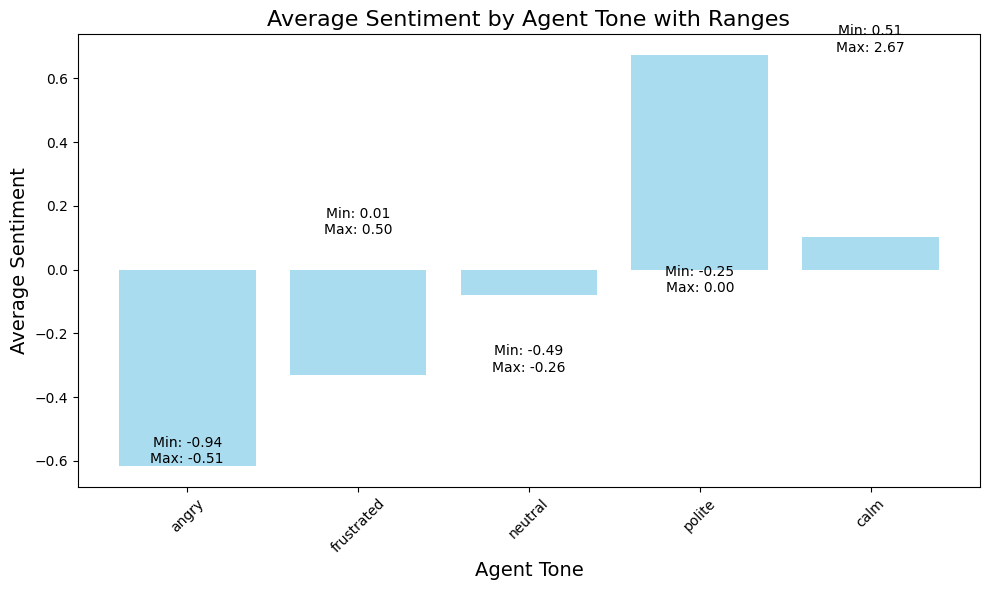

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating min and max average sentiment for each agent tone
tone_range = sentiments.groupby('agent_tone')['average_sentiment'].agg(['min', 'max', 'mean']).reset_index()

# Setting the order of tones explicitly
desired_order = ['angry', 'frustrated', 'neutral', 'polite', 'calm']
tone_range['agent_tone'] = pd.Categorical(tone_range['agent_tone'], categories=desired_order, ordered=True)
tone_range = tone_range.sort_values('agent_tone')  # Sort the DataFrame by the ordered tones

tones = tone_range['agent_tone']
mean_values = tone_range['mean']
min_values = tone_range['min']
max_values = tone_range['max']

plt.figure(figsize=(10, 6))

plt.bar(tones, mean_values, color='skyblue', alpha=0.7)

for i in range(len(tones)):
    plt.text(i, mean_values[i] + 0.001,
             f"Min: {min_values[i]:.2f}\nMax: {max_values[i]:.2f}", 
             ha='center', va='bottom', fontsize=10)

plt.title('Average Sentiment by Agent Tone with Ranges', fontsize=16)
plt.xlabel('Agent Tone', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [40]:
# tones = tone_range['agent_tone_mapped']
# mean_values = tone_range['mean']
# min_values = tone_range['min']
# max_values = tone_range['max']

# plt.figure(figsize=(10, 6))

# plt.bar(tones, mean_values, color='skyblue', alpha=0.7)

# for i in range(len(tones)):
#     plt.text(i, mean_values[i] + 0.001,  
#              f"Min: {min_values[i]:.2f}\nMax: {max_values[i]:.2f}", 
#              ha='center', va='bottom', fontsize=10)

# plt.title('Average Sentiment by Agent Tone with Ranges', fontsize=16)
# plt.xlabel('Agent Tone', fontsize=14)
# plt.ylabel('Average Sentiment', fontsize=14)
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

In [41]:
# final2 = final.copy()

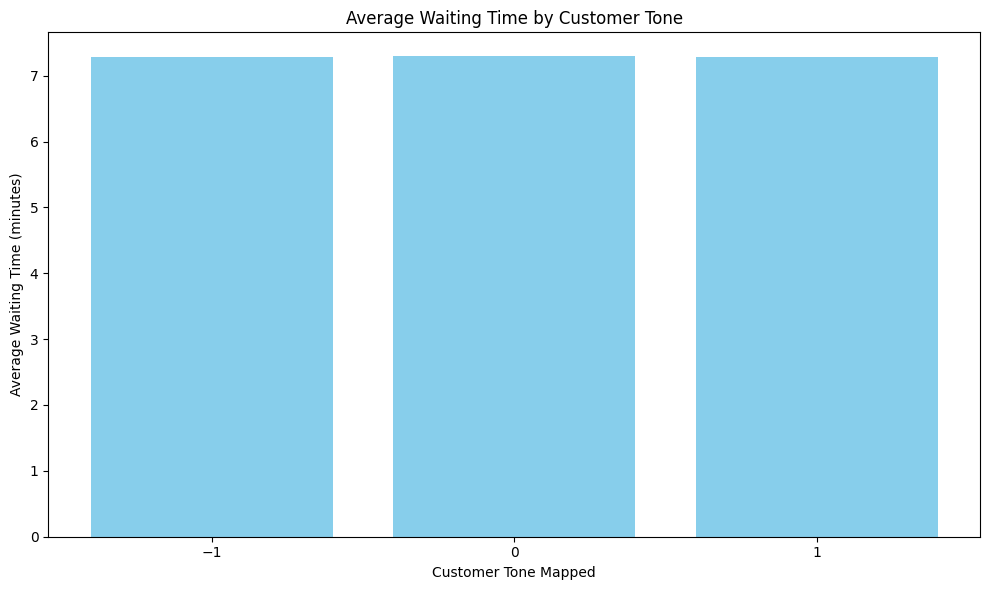

In [42]:
average_waiting_time = final.groupby('customer_tone_mapped')['waiting_time'].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(average_waiting_time['customer_tone_mapped'], average_waiting_time['waiting_time'], color='skyblue')

plt.title('Average Waiting Time by Customer Tone')
plt.xlabel('Customer Tone Mapped')
plt.ylabel('Average Waiting Time (minutes)')

plt.xticks(average_waiting_time['customer_tone_mapped']) 

plt.tight_layout()
plt.show()


In [43]:
# AHT (Average Handle Time):
AHT = final['handle_time'].mean()
AHT

11.619612020464196

In [44]:
# AST (Average Speed to Answer):
AST = final['waiting_time'].mean()
AST

7.282867987937527

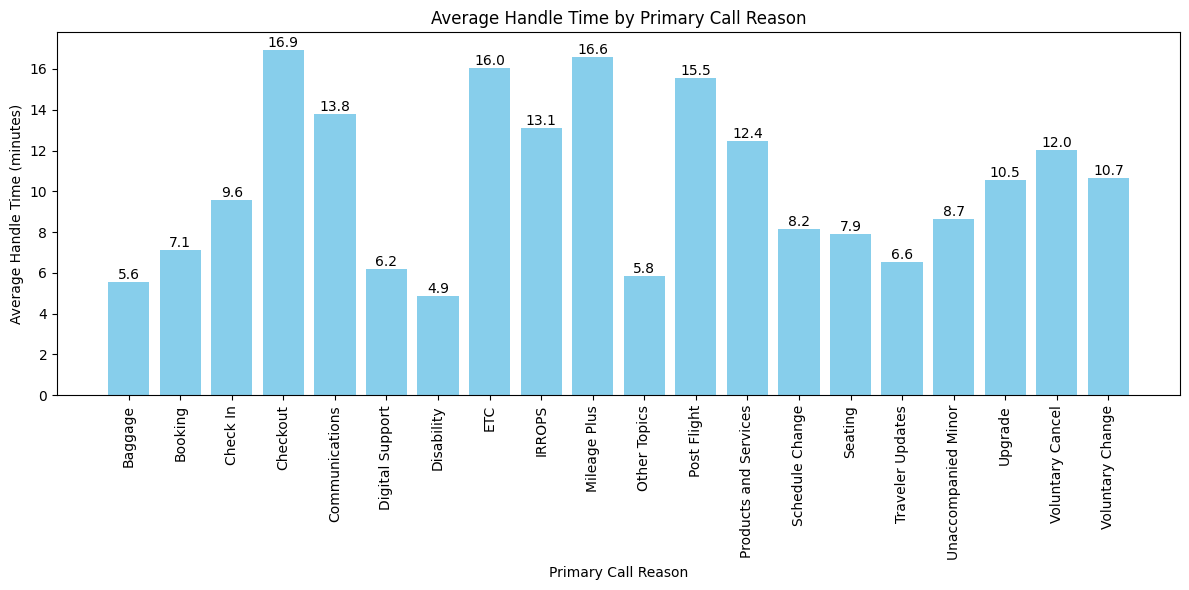

In [45]:
import matplotlib.pyplot as plt

average_handle_time = final.groupby('primary_call_reason')['handle_time'].mean().reset_index()

plt.figure(figsize=(12, 6))

bars = plt.bar(average_handle_time['primary_call_reason'], average_handle_time['handle_time'], color='skyblue')

plt.title('Average Handle Time by Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Handle Time (minutes)')

plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (average handle time)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1f}", ha='center', va='bottom')  # Add text above the bar

plt.tight_layout()
plt.show()


In [46]:
call_reason_counts = final['primary_call_reason'].value_counts().reset_index()
call_reason_counts.columns = ['primary_call_reason', 'frequency']

most_frequent_reason = call_reason_counts.iloc[0]['primary_call_reason']
least_frequent_reason = call_reason_counts.iloc[-1]['primary_call_reason']

average_handle_time_most_frequent = final[final['primary_call_reason'] == most_frequent_reason]['handle_time'].mean()
average_handle_time_least_frequent = final[final['primary_call_reason'] == least_frequent_reason]['handle_time'].mean()

percentage_difference = ((average_handle_time_most_frequent - average_handle_time_least_frequent) / average_handle_time_least_frequent) * 100

print(f"Most Frequent Call Reason: {most_frequent_reason}, Average Handle Time: {average_handle_time_most_frequent:.2f} minutes")
print(f"Least Frequent Call Reason: {least_frequent_reason}, Average Handle Time: {average_handle_time_least_frequent:.2f} minutes")
print(f"Percentage Difference in Average Handle Time: {percentage_difference:.2f}%")


Most Frequent Call Reason: IRROPS, Average Handle Time: 13.09 minutes
Least Frequent Call Reason: Unaccompanied Minor, Average Handle Time: 8.65 minutes
Percentage Difference in Average Handle Time: 51.21%


In [47]:
call_reason_counts

,primary_call_reason,frequency
0,IRROPS,13311
1,Voluntary Change,10848
2,Seating,6365
3,Mileage Plus,5851
4,Post Flight,4330
5,Communications,3840
6,Products and Services,3332
7,Baggage,2832
8,Upgrade,2738
9,Booking,2637


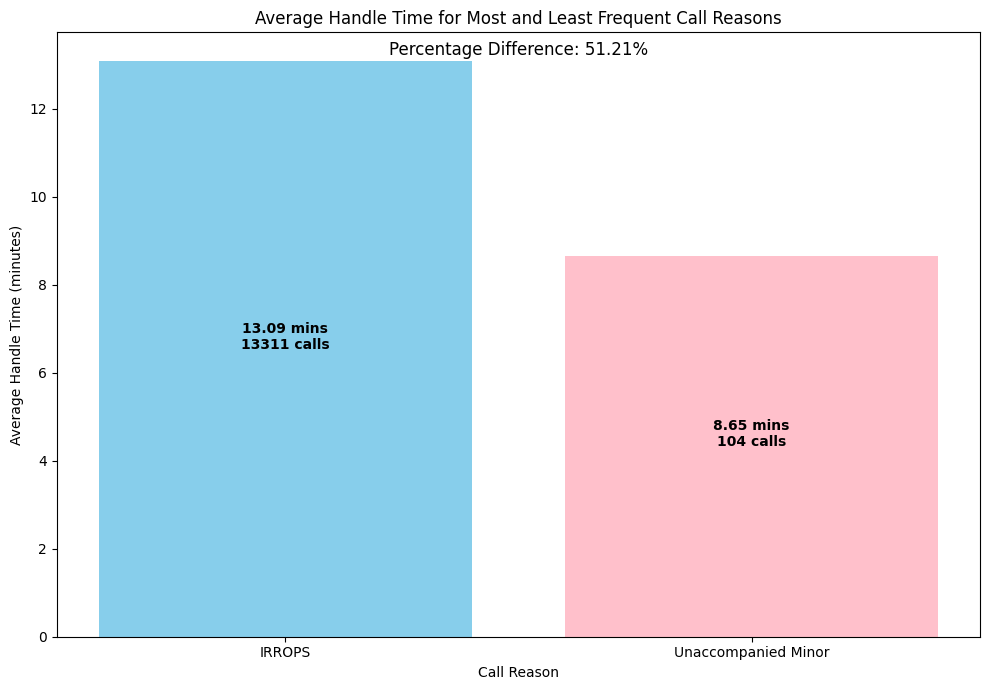

In [48]:
call_reasons = [most_frequent_reason, least_frequent_reason]
average_times = [average_handle_time_most_frequent, average_handle_time_least_frequent]
number_of_calls = [call_reason_counts.iloc[0]['frequency'], call_reason_counts.iloc[-1]['frequency']]

plt.figure(figsize=(10, 7))
bars = plt.bar(call_reasons, average_times, color=['skyblue', 'pink'])

plt.xlabel("Call Reason")
plt.ylabel("Average Handle Time (minutes)")
plt.title("Average Handle Time for Most and Least Frequent Call Reasons")

for i, (v, n) in enumerate(zip(average_times, number_of_calls)):
    plt.text(i, v - (v * 0.5), f"{v:.2f} mins\n{n} calls", ha='center', color="black", weight="bold")

plt.text(0.5, max(average_times) + (max(average_times) * 0.01), f"Percentage Difference: {percentage_difference:.2f}%", 
         ha='center', color="black", fontsize=12)

plt.tight_layout()
plt.show()


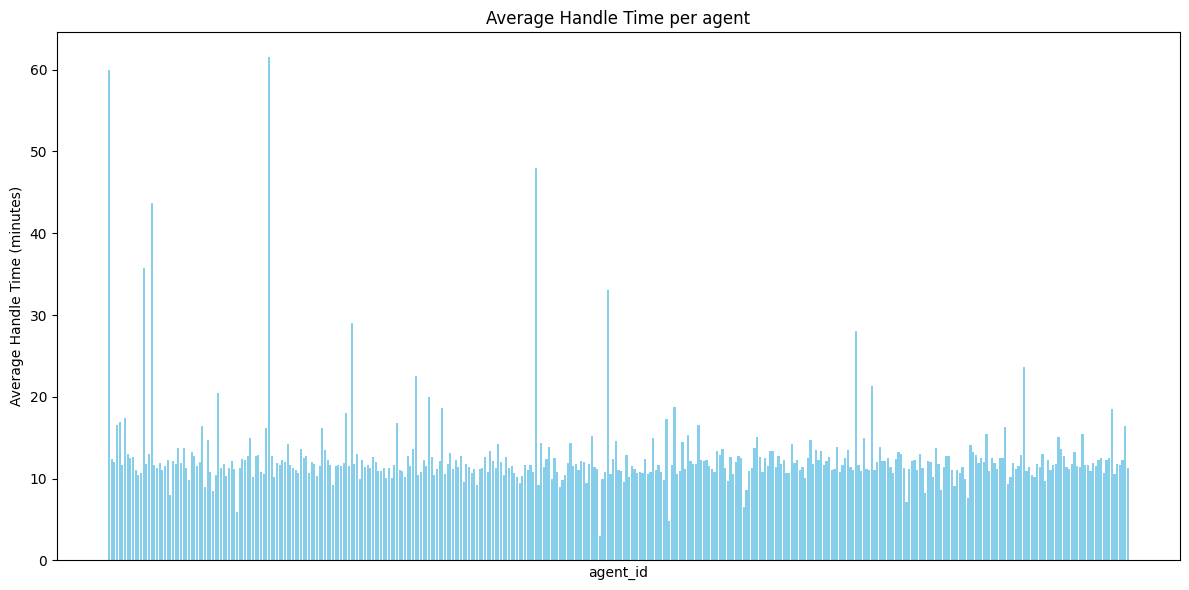

In [49]:
average_handle_time = final.groupby('agent_id')['handle_time'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(average_handle_time['agent_id'].astype(str), average_handle_time['handle_time'], color='skyblue')

# Set the title and labels
plt.title('Average Handle Time per agent')
plt.xlabel('agent_id')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks([]) 

plt.tight_layout()
plt.show()

## 37 agents taking time>=15 mins

In [50]:
agent_ids_above_15 = average_handle_time[average_handle_time['handle_time'] >= 15]['agent_id']

agent_ids_above_15_list = agent_ids_above_15.tolist()
len(agent_ids_above_15_list)


37

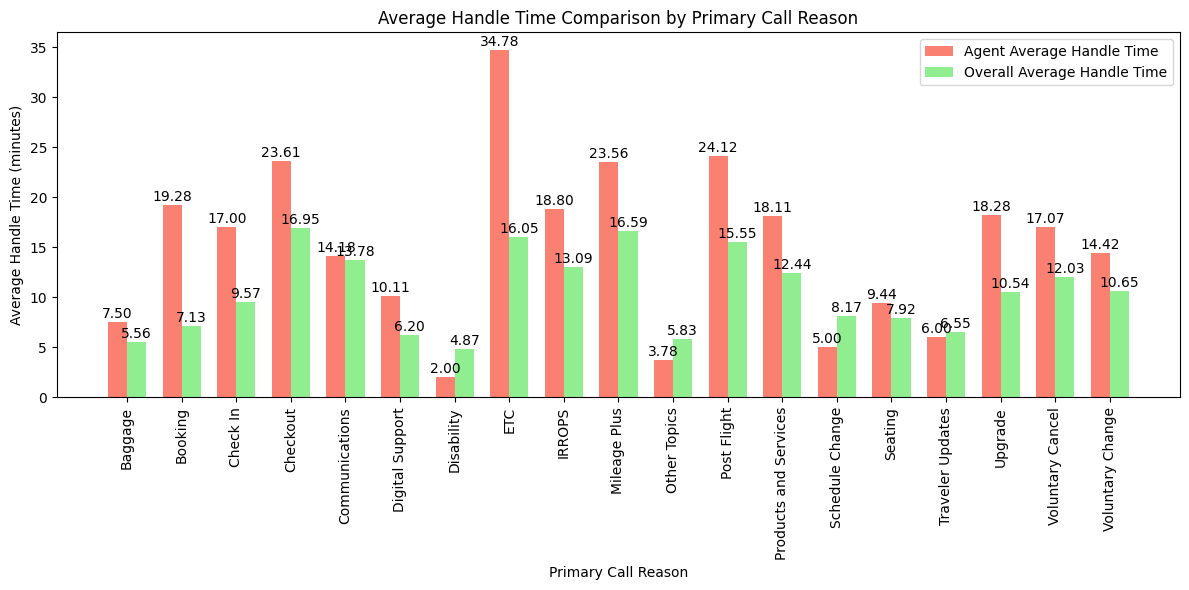

In [51]:
filtered_data = final[final['agent_id'].isin(agent_ids_above_15_list)]

call_reason_counts = filtered_data['primary_call_reason'].value_counts().reset_index()
call_reason_counts.columns = ['primary_call_reason', 'count']

average_handle_time_per_reason = (
    filtered_data.groupby('primary_call_reason')['handle_time']
    .mean()
    .reset_index()
)
average_handle_time_per_reason.columns = ['primary_call_reason', 'average_handle_time']

overall_average_handle_time = (
    final.groupby('primary_call_reason')['handle_time']
    .mean()
    .reset_index()
)
overall_average_handle_time.columns = ['primary_call_reason', 'overall_average_handle_time']

merged_data = pd.merge(average_handle_time_per_reason, overall_average_handle_time, on='primary_call_reason')

plt.figure(figsize=(12, 6))

bar_width = 0.35
x = range(len(merged_data))

bars1 = plt.bar(x, merged_data['average_handle_time'], width=bar_width, color='salmon', label='Agent Average Handle Time')
bars2 = plt.bar([p + bar_width for p in x], merged_data['overall_average_handle_time'], width=bar_width, color='lightgreen', label='Overall Average Handle Time')

plt.title('Average Handle Time Comparison by Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks([p + bar_width / 2 for p in x], merged_data['primary_call_reason'], rotation=90)  # Center the x-ticks

plt.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 37 agents are taking more time than avg. time to resolve the issues in 15/19 reasons.

<Figure size 1600x800 with 0 Axes>

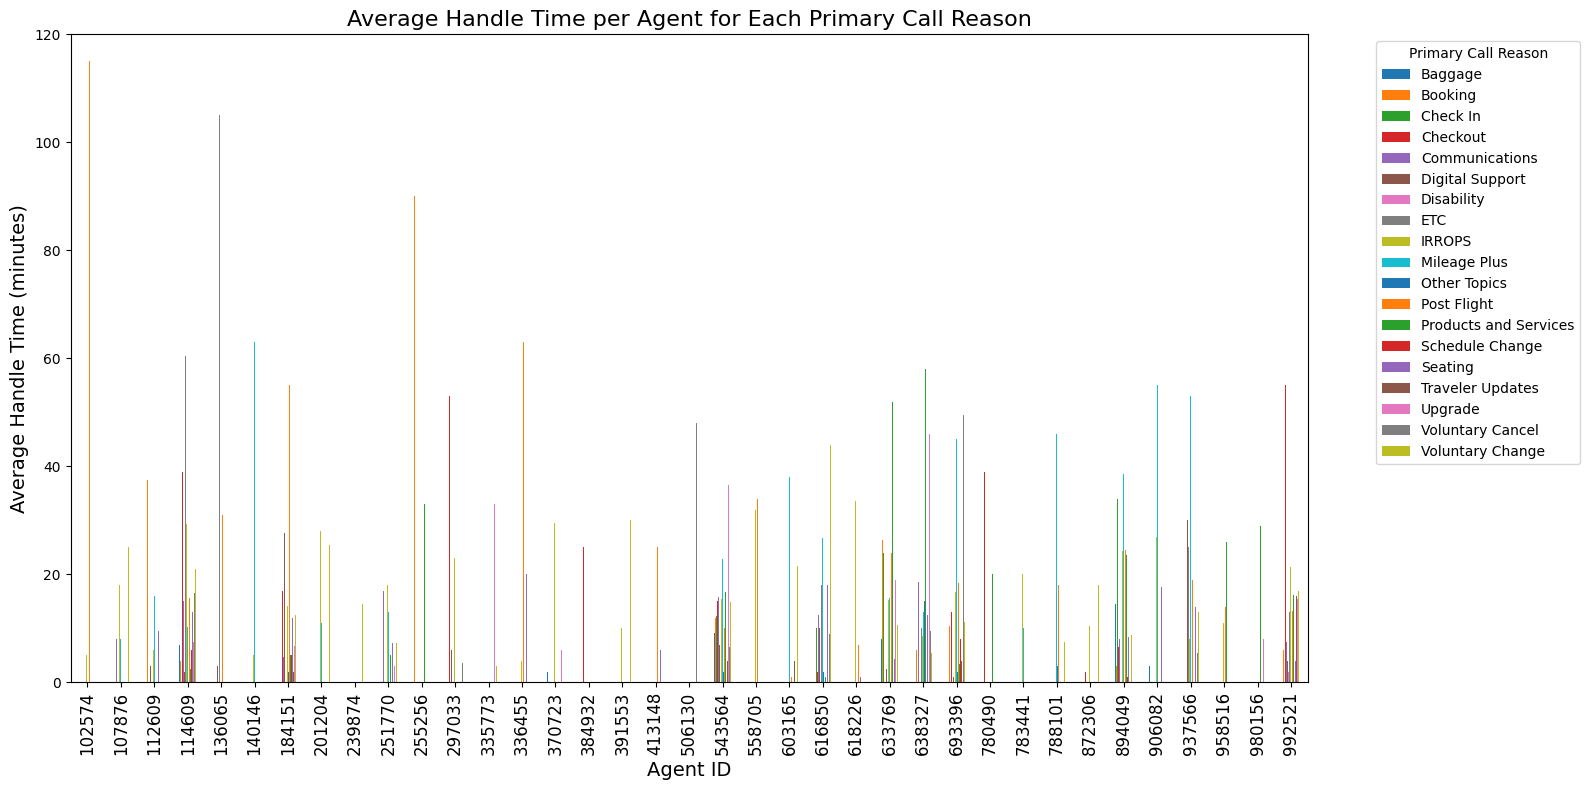

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = final[final['agent_id'].isin(agent_ids_above_15_list)]

agent_call_reason_avg = (
    filtered_data.groupby(['agent_id', 'primary_call_reason'])['handle_time']
    .mean()
    .reset_index()
)
agent_call_reason_avg.columns = ['agent_id', 'primary_call_reason', 'average_handle_time']

pivot_data = agent_call_reason_avg.pivot(index='agent_id', columns='primary_call_reason', values='average_handle_time')

plt.figure(figsize=(16, 8))  # Increased size

pivot_data.plot(kind='bar', figsize=(16, 8))

plt.title('Average Handle Time per Agent for Each Primary Call Reason', fontsize=16)
plt.xlabel('Agent ID', fontsize=14)
plt.ylabel('Average Handle Time (minutes)', fontsize=14)
plt.xticks(rotation=90, fontsize=12) 

plt.ylim(0, pivot_data.max().max() + 5) 

plt.legend(title='Primary Call Reason', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


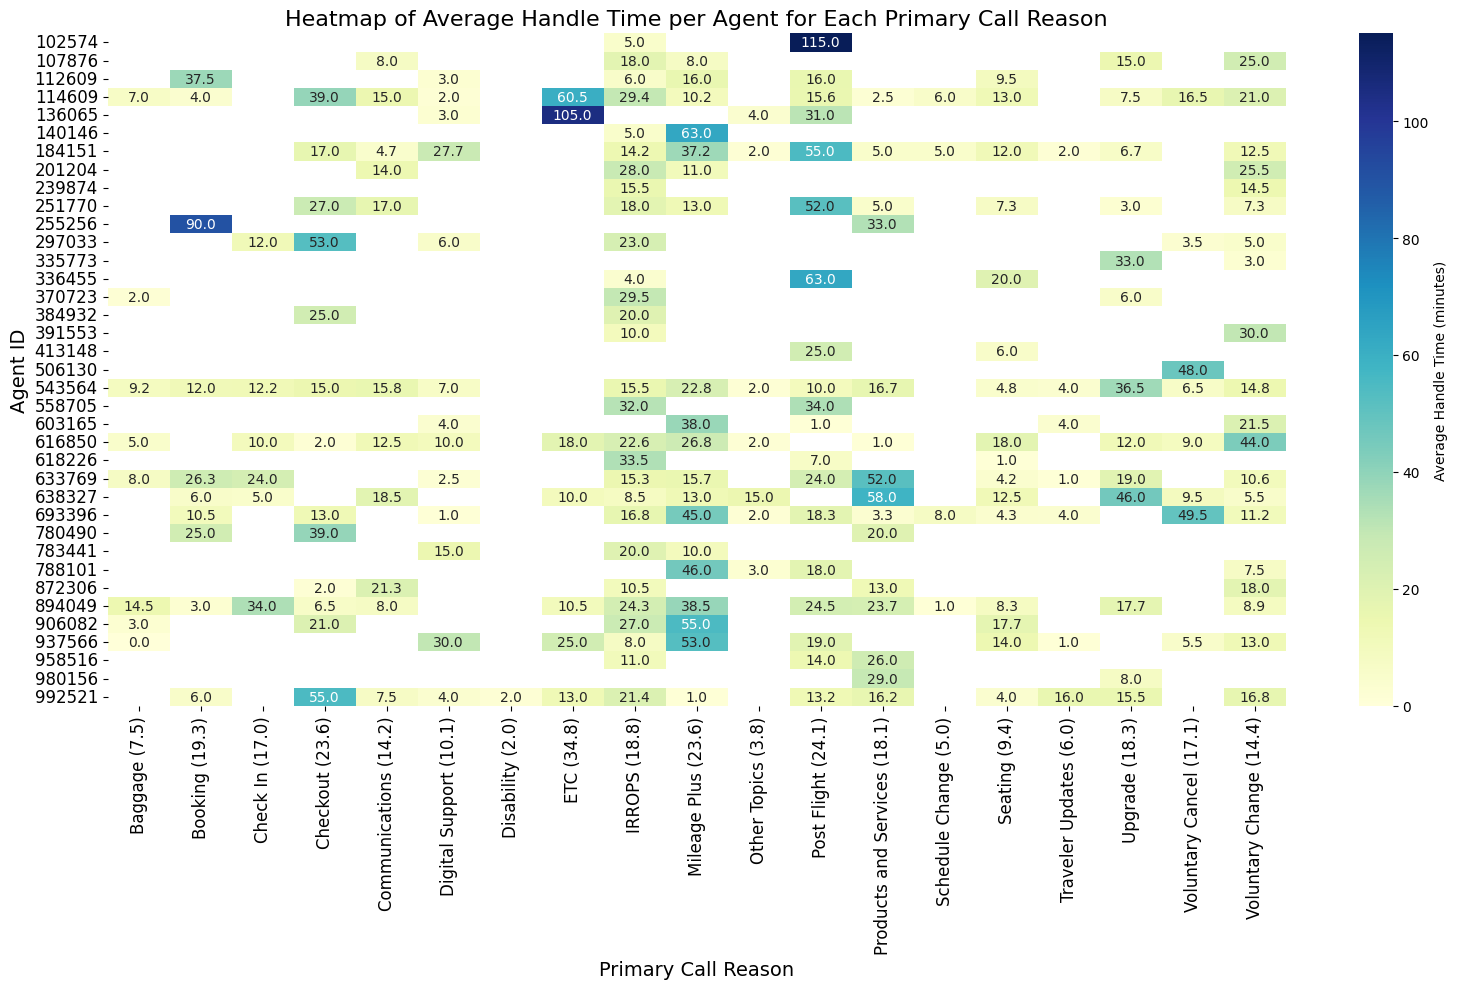

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_data = final[final['agent_id'].isin(agent_ids_above_15_list)]

agent_call_reason_avg = (
    filtered_data.groupby(['agent_id', 'primary_call_reason'])['handle_time']
    .mean()
    .reset_index()
)
agent_call_reason_avg.columns = ['agent_id', 'primary_call_reason', 'average_handle_time']

pivot_data = agent_call_reason_avg.pivot(index='agent_id', columns='primary_call_reason', values='average_handle_time')

overall_avg_time = filtered_data.groupby('primary_call_reason')['handle_time'].mean()

custom_labels = [f"{reason} ({overall_avg_time[reason]:.1f})" for reason in pivot_data.columns]

plt.figure(figsize=(16, 10))  

sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Average Handle Time (minutes)'}, 
            xticklabels=custom_labels)  # Use custom labels for x-tick labels

plt.title('Heatmap of Average Handle Time per Agent for Each Primary Call Reason', fontsize=16)
plt.xlabel('Primary Call Reason', fontsize=14)
plt.ylabel('Agent ID', fontsize=14)
plt.xticks(rotation=90, fontsize=12) 
plt.yticks(rotation=0, fontsize=12)  
plt.tight_layout()
plt.savefig('corr.jpg')
plt.show()



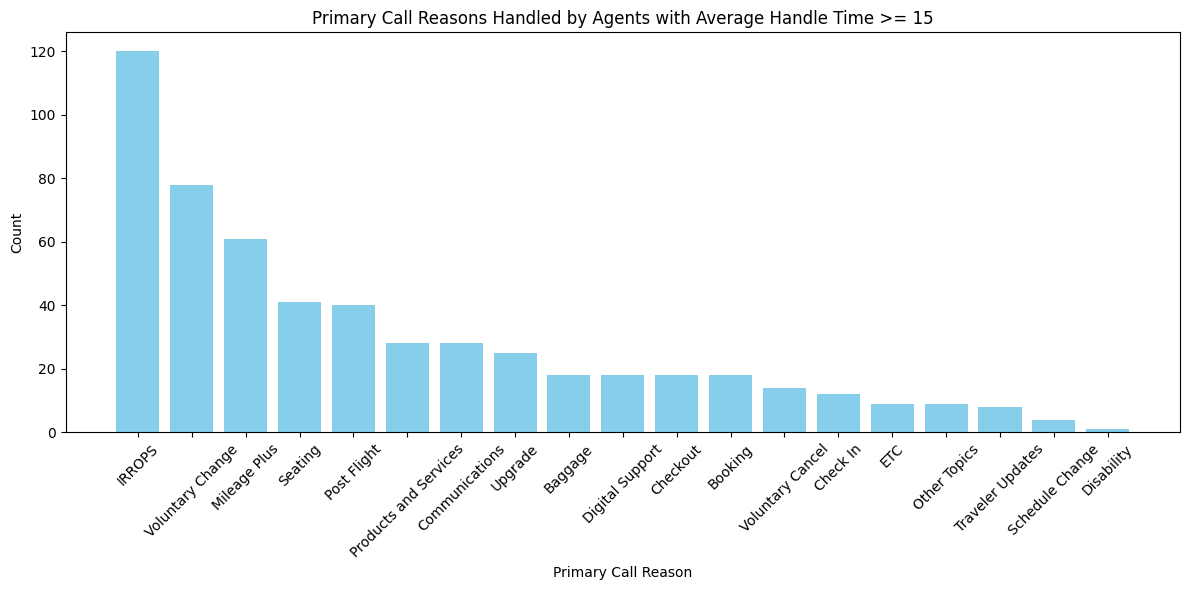

In [54]:
filtered_data = final[final['agent_id'].isin(agent_ids_above_15_list)]

call_reason_counts = filtered_data['primary_call_reason'].value_counts().reset_index()
call_reason_counts.columns = ['primary_call_reason', 'count']

plt.figure(figsize=(12, 6))

plt.bar(call_reason_counts['primary_call_reason'], call_reason_counts['count'], color='skyblue')

plt.title('Primary Call Reasons Handled by Agents with Average Handle Time >= 15')
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


## 13 agents taking time>=20 mins

In [55]:
agent_ids_above_20 = average_handle_time[average_handle_time['handle_time'] >= 20]['agent_id']

agent_ids_above_20_list = agent_ids_above_20.tolist()
agent_ids_above_20_list


[102574,
 136065,
 140146,
 201204,
 255256,
 336455,
 384932,
 391553,
 506130,
 558705,
 780490,
 788101,
 906082]

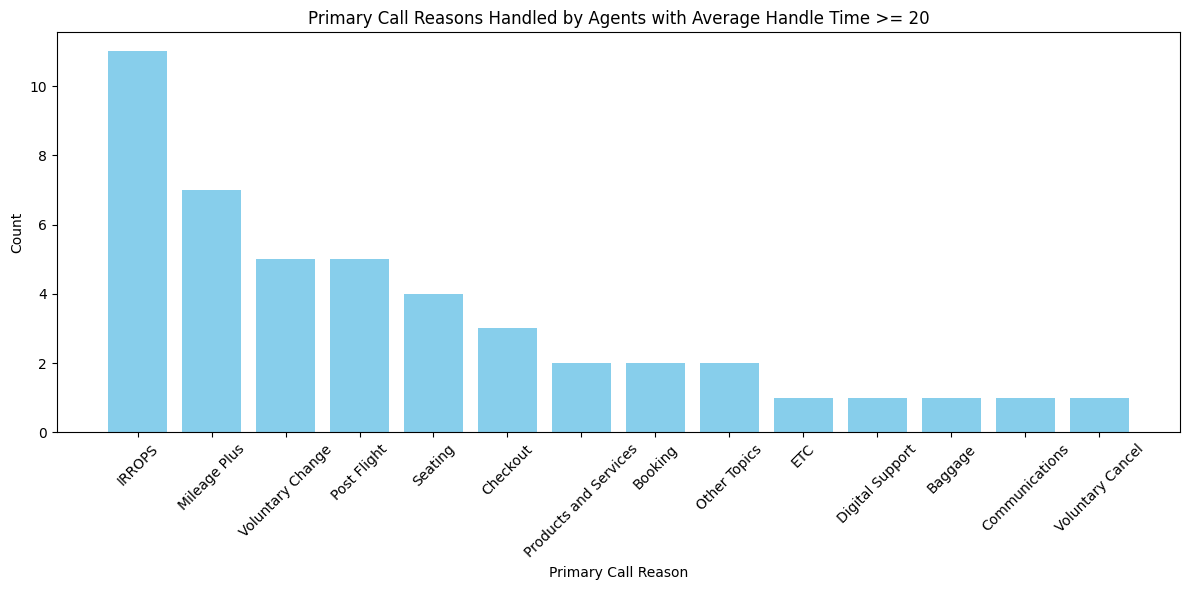

In [56]:
filtered_data = final[final['agent_id'].isin(agent_ids_above_20_list)]

call_reason_counts = filtered_data['primary_call_reason'].value_counts().reset_index()
call_reason_counts.columns = ['primary_call_reason', 'count']

plt.figure(figsize=(12, 6))

plt.bar(call_reason_counts['primary_call_reason'], call_reason_counts['count'], color='skyblue')

plt.title('Primary Call Reasons Handled by Agents with Average Handle Time >= 20')
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


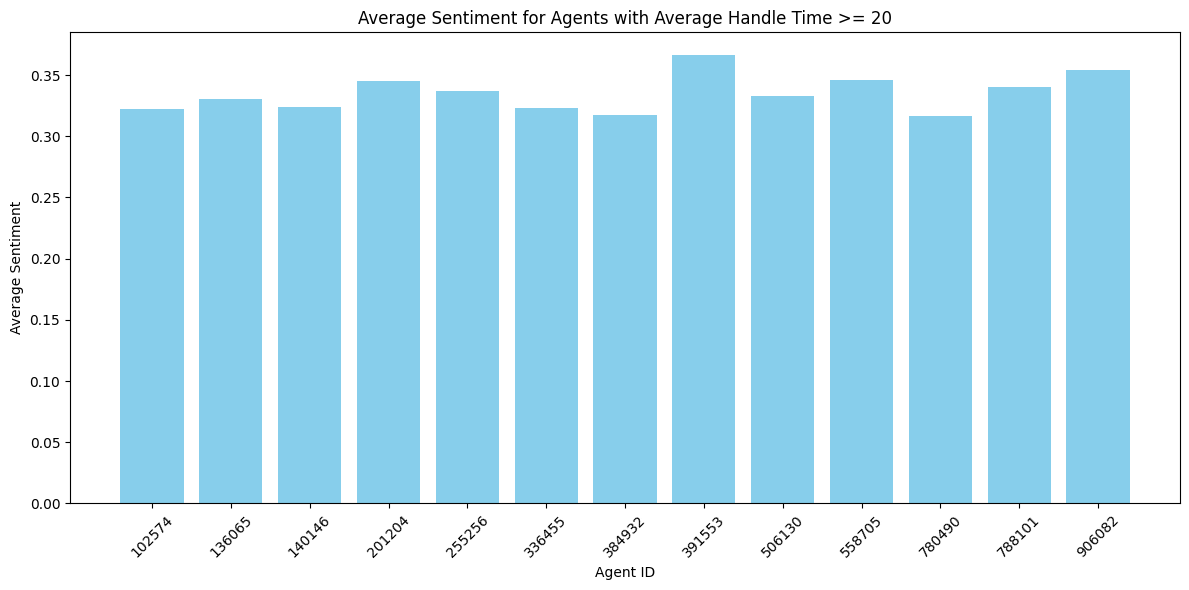

In [57]:
average_sentiment = final.groupby('agent_id')['average_sentiment'].mean().reset_index()

merged_data = pd.merge(average_handle_time, average_sentiment, on='agent_id', how='inner')

filtered_average_sentiment = merged_data[merged_data['agent_id'].isin(agent_ids_above_20_list)]

if 'average_sentiment' in filtered_average_sentiment.columns:
    plt.figure(figsize=(12, 6))

    plt.bar(filtered_average_sentiment['agent_id'].astype(str), filtered_average_sentiment['average_sentiment'], color='skyblue')

    plt.title('Average Sentiment for Agents with Average Handle Time >= 20')
    plt.xlabel('Agent ID')
    plt.ylabel('Average Sentiment')
    plt.xticks(rotation=45) 

    plt.tight_layout()
    plt.show()
else:
    print("The column 'average_sentiment' does not exist in the filtered DataFrame.")


# 13-> 5 neu, 3 pos, 5 neg

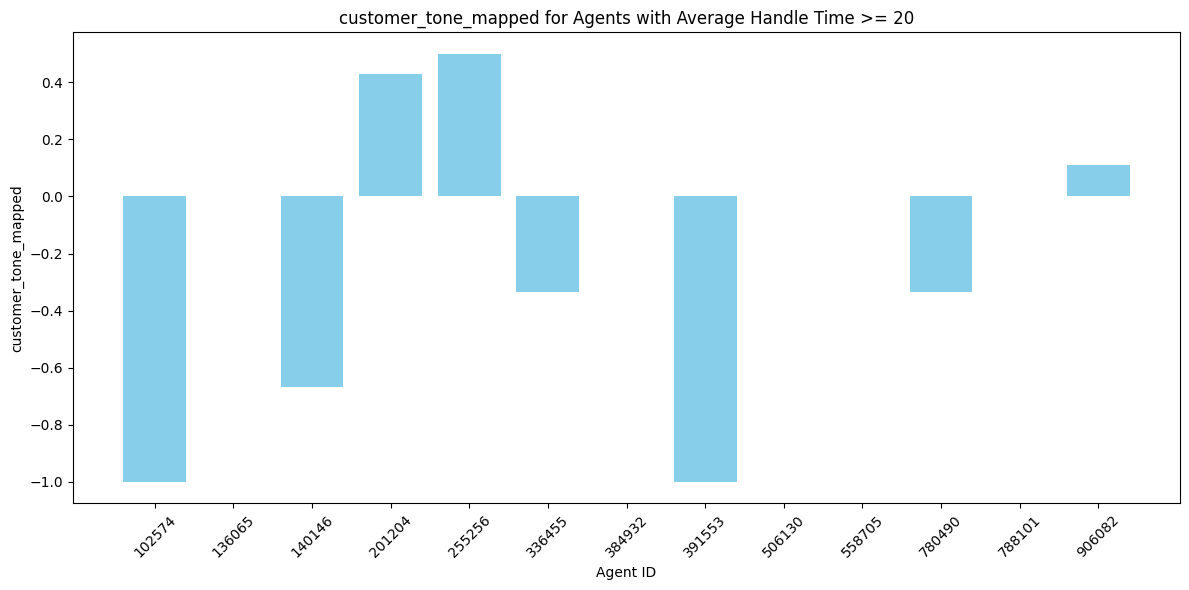

In [58]:
average_sentiment = final.groupby('agent_id')['customer_tone_mapped'].mean().reset_index()

merged_data = pd.merge(average_handle_time, average_sentiment, on='agent_id', how='inner')

filtered_average_sentiment = merged_data[merged_data['agent_id'].isin(agent_ids_above_20_list)]

if 'customer_tone_mapped' in filtered_average_sentiment.columns:
    # Set the figure size
    plt.figure(figsize=(12, 6))

    plt.bar(filtered_average_sentiment['agent_id'].astype(str), filtered_average_sentiment['customer_tone_mapped'], color='skyblue')

    plt.title('customer_tone_mapped for Agents with Average Handle Time >= 20')
    plt.xlabel('Agent ID')
    plt.ylabel('customer_tone_mapped')
    plt.xticks(rotation=45)  

    plt.tight_layout()
    plt.show()
else:
    print("The column 'customer_tone_mapped' does not exist in the filtered DataFrame.")


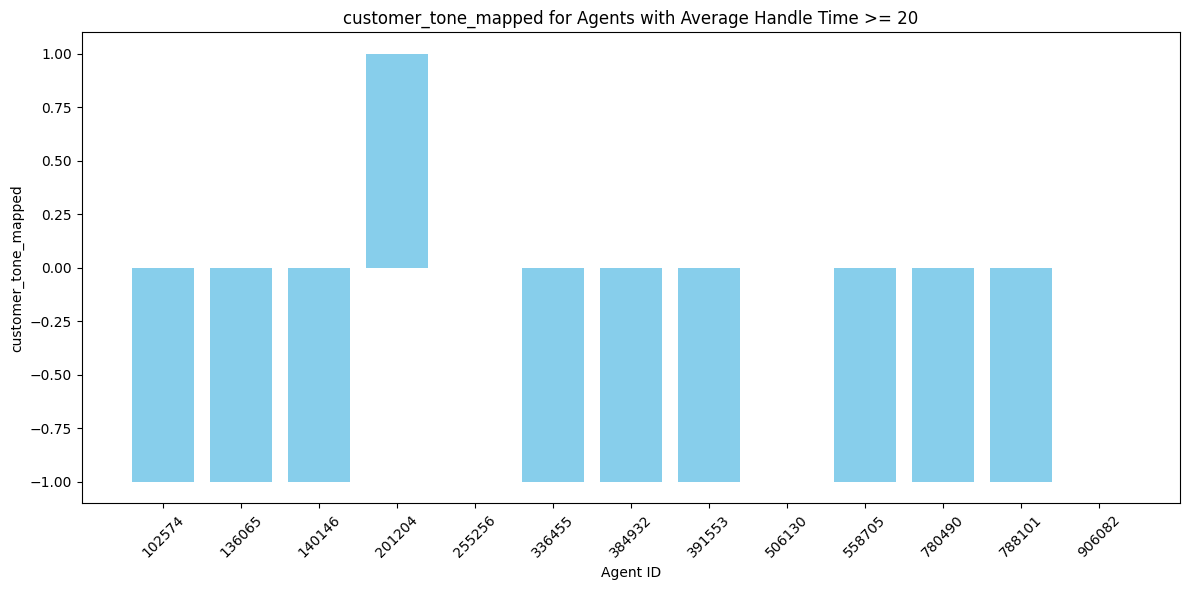

In [59]:
average_sentiment = final.groupby('agent_id')['customer_tone_mapped'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

merged_data = pd.merge(average_handle_time, average_sentiment, on='agent_id', how='inner')

filtered_average_sentiment = merged_data[merged_data['agent_id'].isin(agent_ids_above_20_list)]

if 'customer_tone_mapped' in filtered_average_sentiment.columns:
    # Set the figure size
    plt.figure(figsize=(12, 6))

    plt.bar(filtered_average_sentiment['agent_id'].astype(str), filtered_average_sentiment['customer_tone_mapped'], color='skyblue')

    plt.title('customer_tone_mapped for Agents with Average Handle Time >= 20')
    plt.xlabel('Agent ID')
    plt.ylabel('customer_tone_mapped')
    plt.xticks(rotation=45) 

    plt.tight_layout()
    plt.show()
else:
    print("The column 'customer_tone_mapped' does not exist in the filtered DataFrame.")


# ye agents ka avg_min 20 mins se jyada hai, inki saari baat-cheet ka record ye batata hai ki customer_sentiment angry aur frustrated tha.

Correlation between elite_level_code and handle_time: 0.04


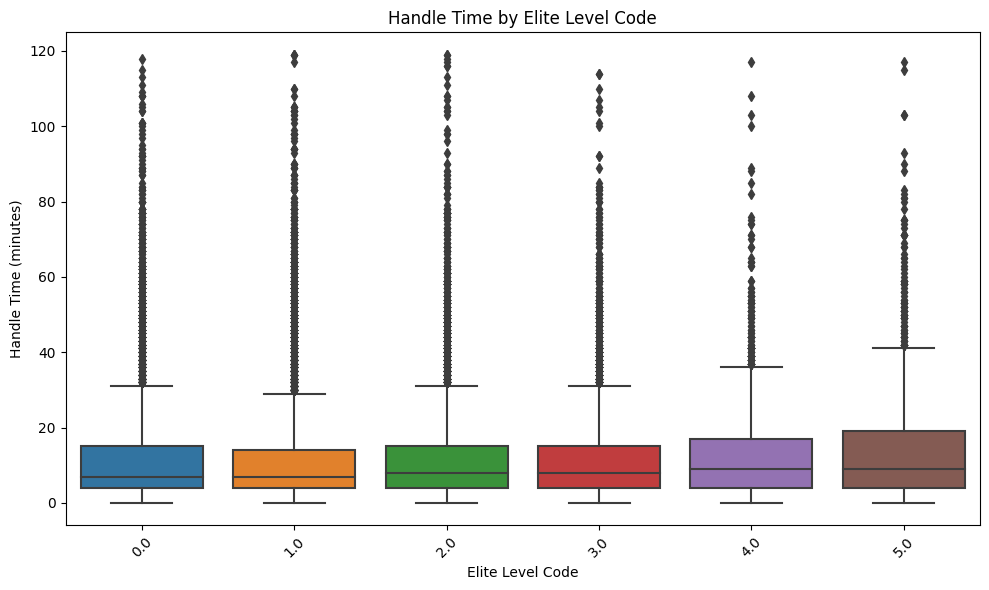

In [60]:
correlation = final['elite_level_code'].corr(final['handle_time'])
print(f'Correlation between elite_level_code and handle_time: {correlation:.2f}')

plt.figure(figsize=(10, 6))
sns.boxplot(x='elite_level_code', y='handle_time', data=final)
plt.title('Handle Time by Elite Level Code')
plt.xlabel('Elite Level Code')
plt.ylabel('Handle Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# no correlation found b/w elite_level and handle_time

### below 10 mins

In [61]:
agent_ids_below_10 = average_handle_time[average_handle_time['handle_time'] <= 10]['agent_id']

agent_ids_below_10_list = agent_ids_below_10.tolist()
agent_ids_below_10_list


[161354,
 175271,
 187770,
 198489,
 229129,
 306996,
 342250,
 422028,
 434222,
 483284,
 510903,
 520243,
 524342,
 524948,
 541395,
 547592,
 548155,
 576990,
 610271,
 616988,
 664625,
 676262,
 677860,
 814757,
 824457,
 835959,
 852069,
 855652,
 859203,
 896798,
 926175]

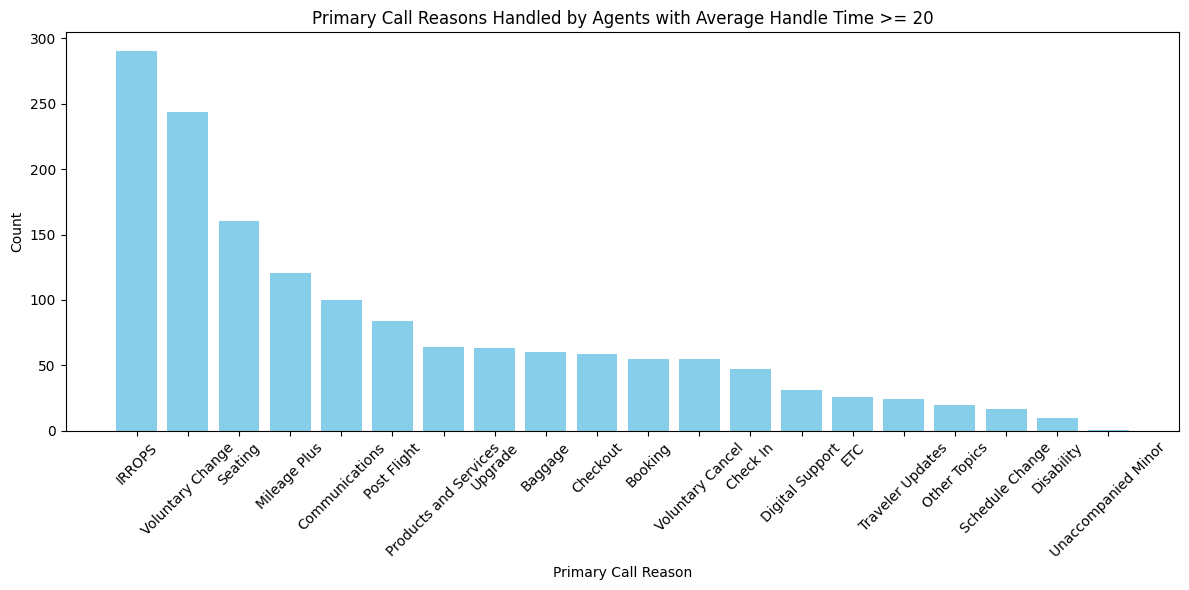

In [62]:
filtered_data = final[final['agent_id'].isin(agent_ids_below_10_list)]

call_reason_counts = filtered_data['primary_call_reason'].value_counts().reset_index()
call_reason_counts.columns = ['primary_call_reason', 'count']

plt.figure(figsize=(12, 6))

plt.bar(call_reason_counts['primary_call_reason'], call_reason_counts['count'], color='skyblue')

plt.title('Primary Call Reasons Handled by Agents with Average Handle Time >= 20')
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


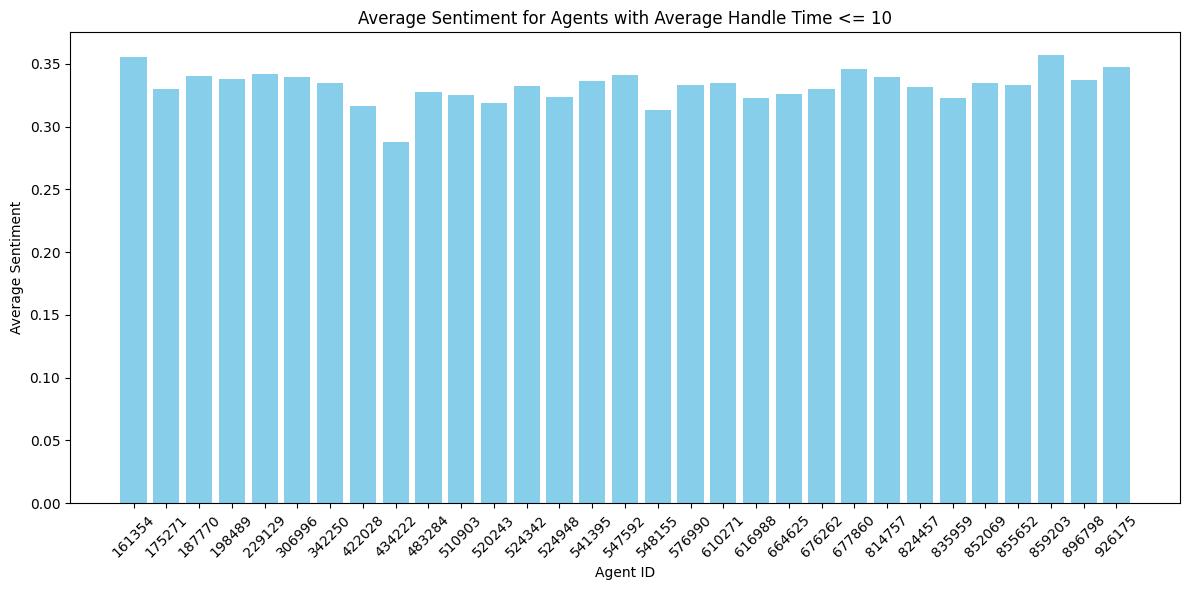

In [63]:
average_sentiment = final.groupby('agent_id')['average_sentiment'].mean().reset_index()

merged_data = pd.merge(average_handle_time, average_sentiment, on='agent_id', how='inner')

filtered_average_sentiment = merged_data[merged_data['agent_id'].isin(agent_ids_below_10_list)]

if 'average_sentiment' in filtered_average_sentiment.columns:
    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Create a bar plot for average sentiment by agent ID
    plt.bar(filtered_average_sentiment['agent_id'].astype(str), filtered_average_sentiment['average_sentiment'], color='skyblue')

    # Set the title and labels
    plt.title('Average Sentiment for Agents with Average Handle Time <= 10')
    plt.xlabel('Agent ID')
    plt.ylabel('Average Sentiment')
    plt.xticks(rotation=45) 

    plt.tight_layout()
    plt.show()
else:
    print("The column 'average_sentiment' does not exist in the filtered DataFrame.")


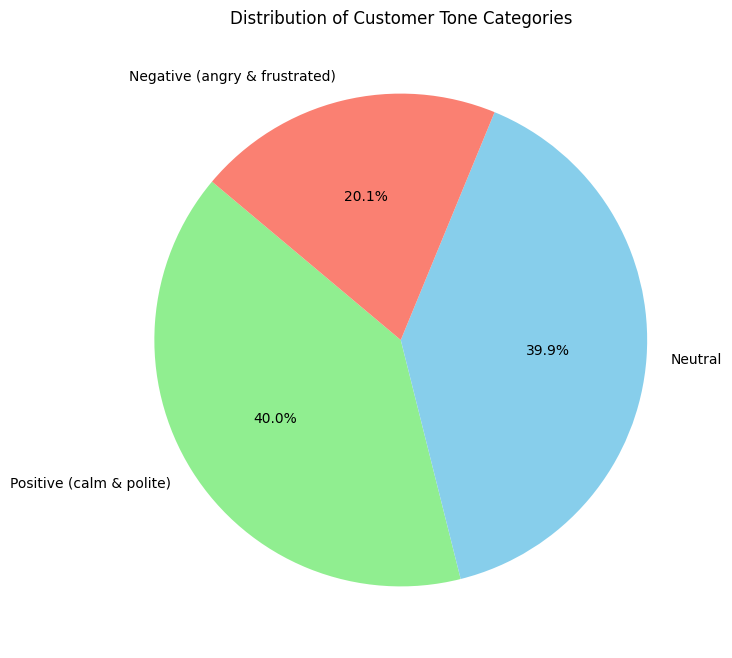

In [64]:
tone_counts = final['customer_tone_mapped'].value_counts()

tone_labels = ['Positive (calm & polite)', 'Neutral', 'Negative (angry & frustrated)']

plt.figure(figsize=(8, 8))
plt.pie(tone_counts, labels=tone_labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'skyblue', 'salmon'])
plt.title('Distribution of Customer Tone Categories')
plt.show()


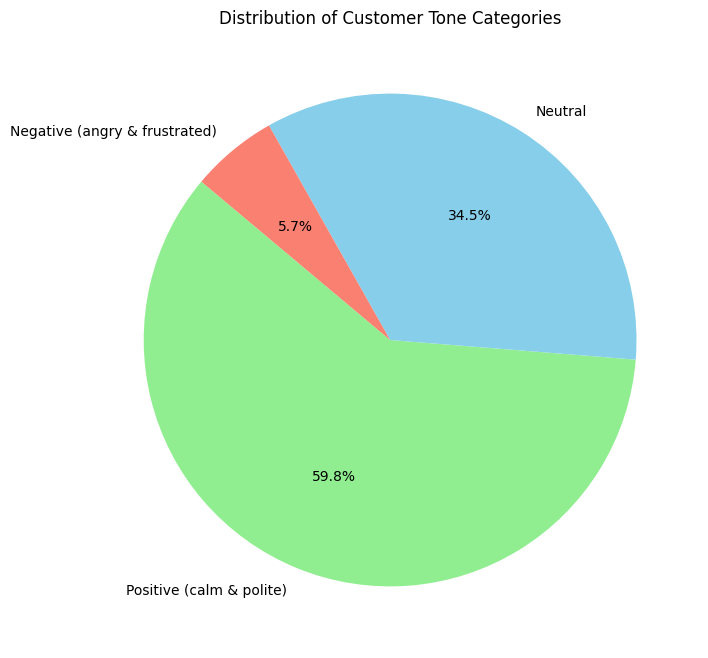

In [65]:
tone_counts = final['agent_tone_mapped'].value_counts()

tone_labels = ['Positive (calm & polite)', 'Neutral', 'Negative (angry & frustrated)']

plt.figure(figsize=(8, 8))
plt.pie(tone_counts, labels=tone_labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'skyblue', 'salmon'])
plt.title('Distribution of Customer Tone Categories')
plt.show()


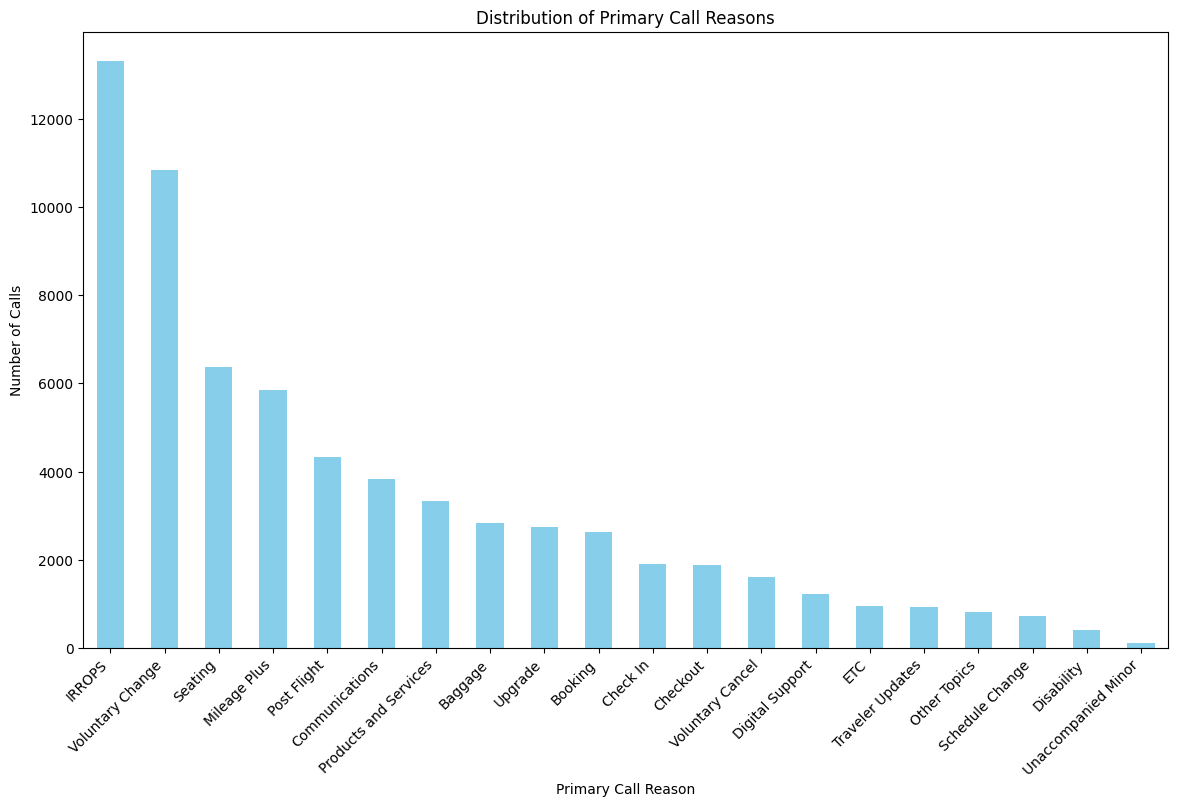

In [66]:
call_reason_counts = final['primary_call_reason'].value_counts()

plt.figure(figsize=(14, 8))
call_reason_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Primary Call Reasons')
plt.xlabel('Primary Call Reason')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.show()


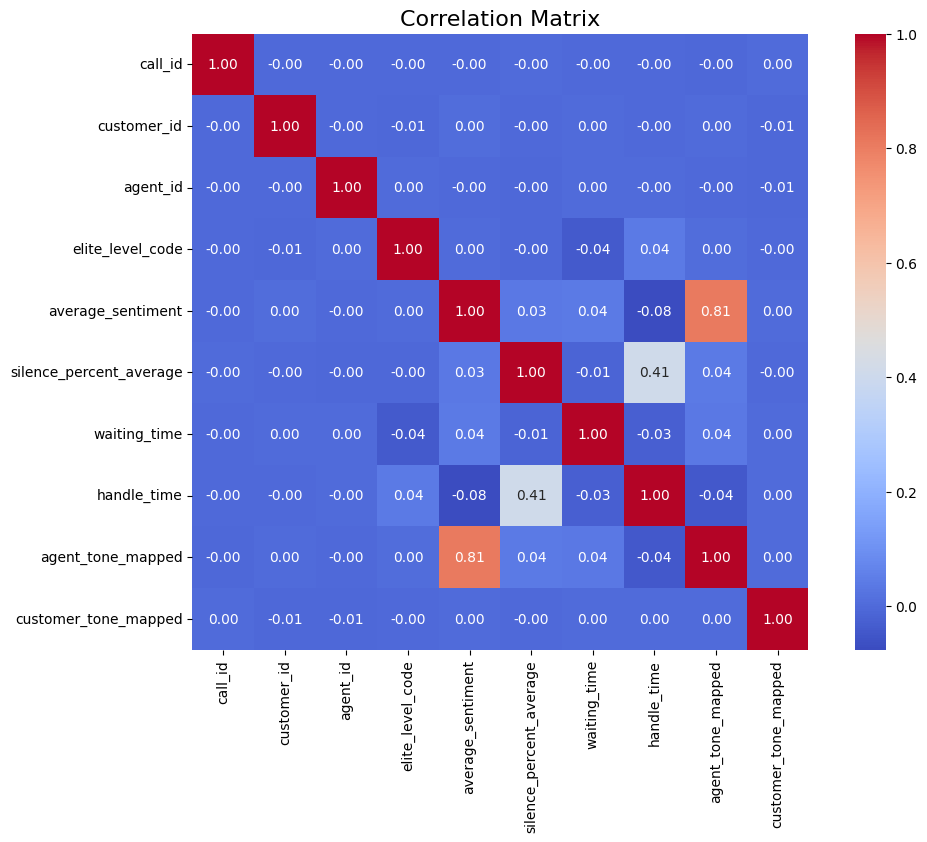

In [67]:
columns_to_plot = [
    'call_id',
    'customer_id',
    'agent_id',
    'elite_level_code',
    'average_sentiment',
    'silence_percent_average',
    'waiting_time',
    'handle_time',
    'agent_tone_mapped',
    'customer_tone_mapped'
]

correlation_matrix = final[columns_to_plot].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)

plt.title('Correlation Matrix', fontsize=16)

plt.show()


# customer is ready to wait, just need solution

In [68]:
agent_id_counts = final['agent_id'].value_counts()

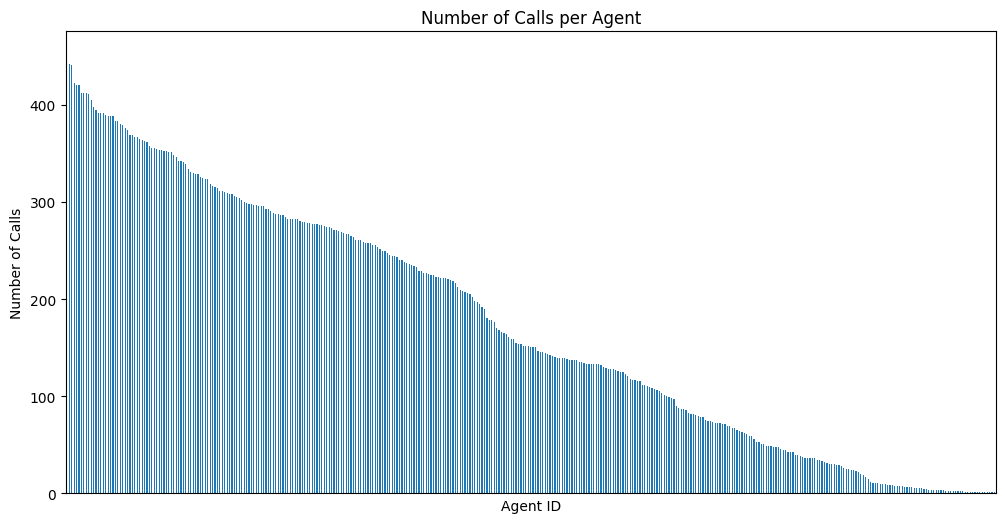

In [69]:
plt.figure(figsize=(12, 6))
agent_id_counts.plot(kind='bar')
plt.title('Number of Calls per Agent')
plt.xlabel('Agent ID')
plt.ylabel('Number of Calls')
plt.xticks([]) 
plt.show()

In [74]:
final

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,elite_level_code,average_sentiment,silence_percent_average,primary_call_reason,waiting_time,handle_time,agent_tone_mapped,customer_tone_mapped
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,4.0,0.330864,0.39,Voluntary Cancel,7.0,31.0,0.0,-1
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,NaN,0.345679,0.35,Booking,3.0,12.0,1.0,0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,NaN,0.308642,0.32,IRROPS,8.0,19.0,0.0,1
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,2.0,0.291358,0.20,Upgrade,5.0,7.0,0.0,-1
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0.328395,0.35,Seating,10.0,9.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,2.0,0.293827,0.51,Mileage Plus,6.0,10.0,0.0,-1
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,NaN,0.353086,0.34,Post Flight,9.0,28.0,1.0,1
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,1.0,0.348148,0.22,Upgrade,3.0,8.0,1.0,-1
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,NaN,0.353086,0.42,Upgrade,6.0,6.0,1.0,1


# Analysing High Volume call periods

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

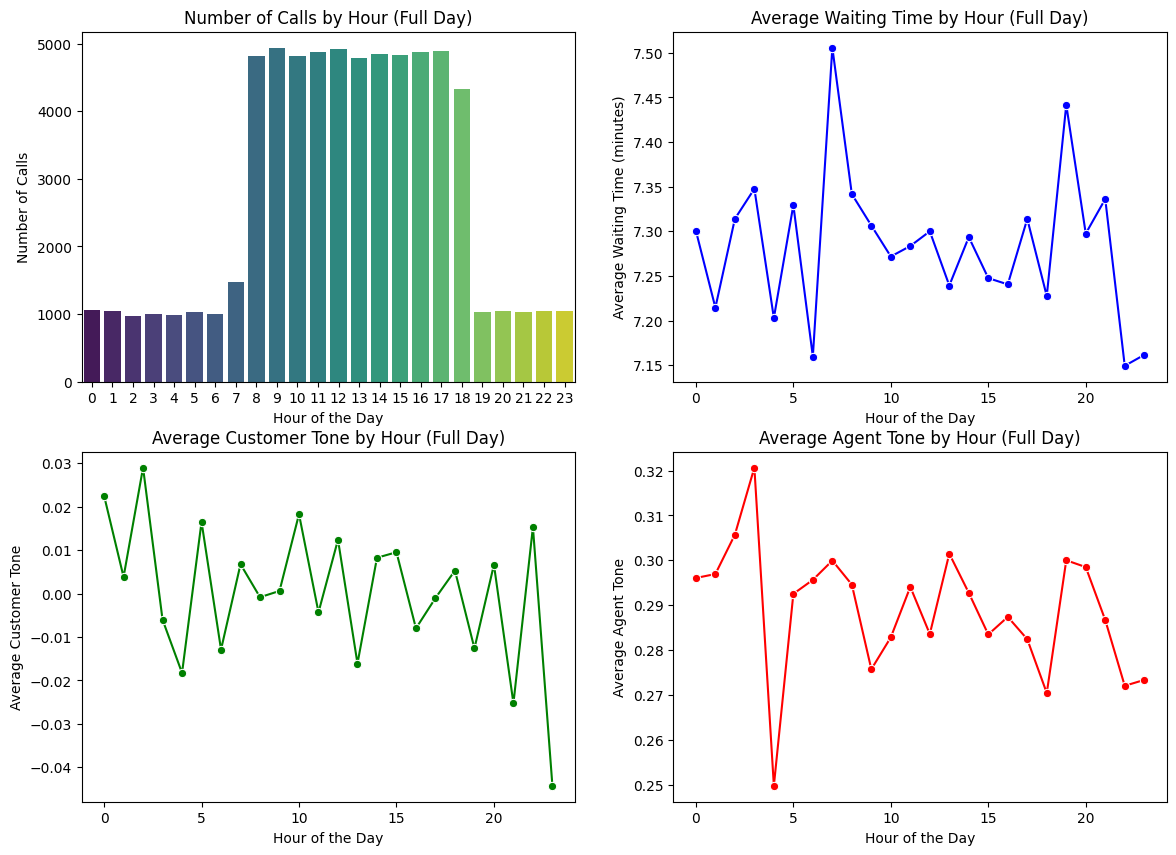

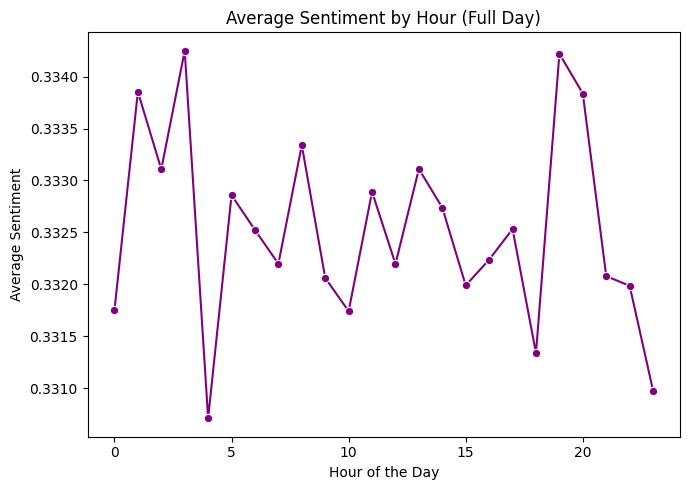

In [78]:
final['hour'] = final['call_start_datetime'].dt.hour 

plt.figure(figsize=(14, 10))

# count of calls by hour for the full day
plt.subplot(2, 2, 1)
sns.countplot(data=final, x='hour', palette='viridis')
plt.title('Number of Calls by Hour (Full Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.savefig('number_of_calls_full_day.jpg')

# average waiting time by hour for the full day
plt.subplot(2, 2, 2)
waiting_time_avg = final.groupby('hour')['waiting_time'].mean()
sns.lineplot(x=waiting_time_avg.index, y=waiting_time_avg.values, marker="o", color="b")
plt.title('Average Waiting Time by Hour (Full Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Waiting Time (minutes)')
plt.savefig('average_waiting_time_full_day.jpg')

# average customer tone by hour for the full day
plt.subplot(2, 2, 3)
customer_tone_avg = final.groupby('hour')['customer_tone_mapped'].mean()
sns.lineplot(x=customer_tone_avg.index, y=customer_tone_avg.values, marker="o", color="g")
plt.title('Average Customer Tone by Hour (Full Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Customer Tone')
plt.savefig('average_customer_tone_full_day.jpg')

# average agent tone by hour for the full day
plt.subplot(2, 2, 4)
agent_tone_avg = final.groupby('hour')['agent_tone_mapped'].mean()
sns.lineplot(x=agent_tone_avg.index, y=agent_tone_avg.values, marker="o", color="r")
plt.title('Average Agent Tone by Hour (Full Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Agent Tone')
plt.savefig('average_agent_tone_full_day.jpg')

# Plot average sentiment by hour for the full day
plt.figure(figsize=(7, 5))
average_sentiment_avg = final.groupby('hour')['average_sentiment'].mean()
sns.lineplot(x=average_sentiment_avg.index, y=average_sentiment_avg.values, marker="o", color="purple")
plt.title('Average Sentiment by Hour (Full Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Sentiment')
plt.savefig('average_sentiment_full_day.jpg')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


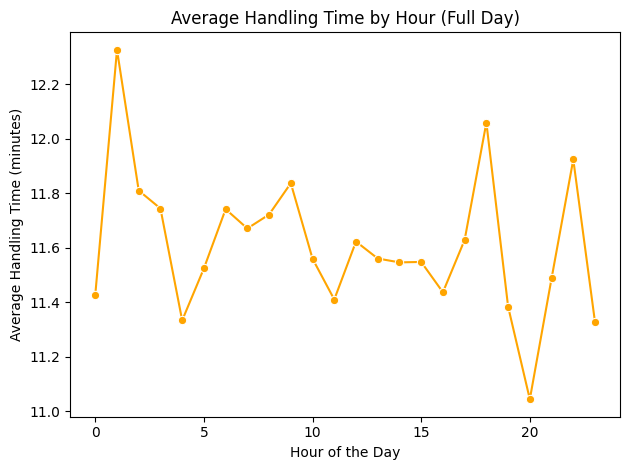

In [81]:
# Average handling time by hour
handling_time_avg = final.groupby('hour')['handle_time'].mean()
sns.lineplot(x=handling_time_avg.index, y=handling_time_avg.values, marker="o", color="orange")
plt.title('Average Handling Time by Hour (Full Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Handling Time (minutes)')
plt.savefig('average_handling_time_full_day.jpg')

plt.tight_layout()
plt.show()

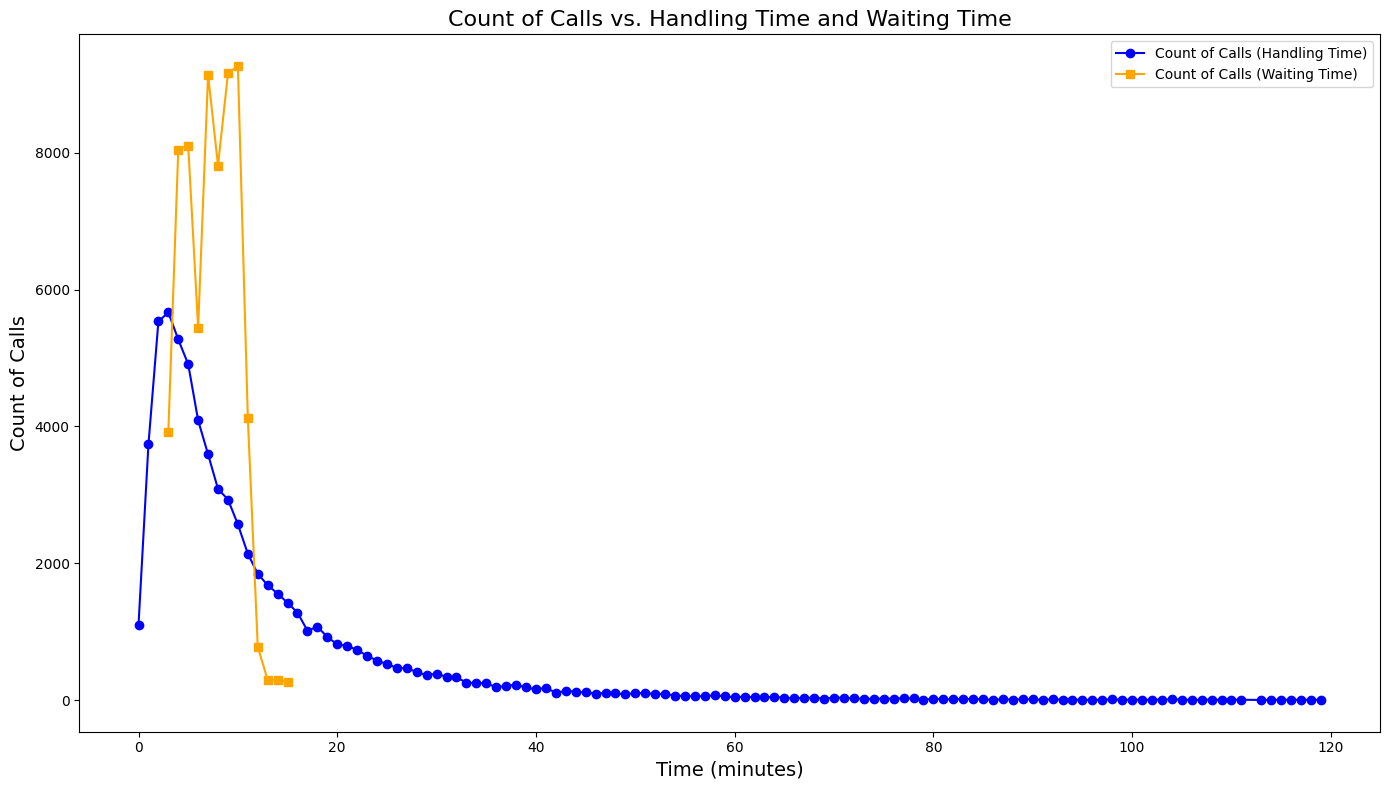

In [93]:
call_count = final['handle_time'].value_counts().sort_index()
waiting_time_count = final['waiting_time'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
plt.plot(call_count.index, call_count.values, color='blue', label='Count of Calls (Handling Time)', marker='o')

plt.plot(waiting_time_count.index, waiting_time_count.values, color='orange', label='Count of Calls (Waiting Time)', marker='s')

plt.xlabel('Time (minutes)', fontsize=14)
plt.ylabel('Count of Calls', fontsize=14)
plt.title('Count of Calls vs. Handling Time and Waiting Time', fontsize=16)

plt.legend()

plt.tight_layout()
plt.savefig('Count of Calls vs. Handling Time and Waiting Time.jpg')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


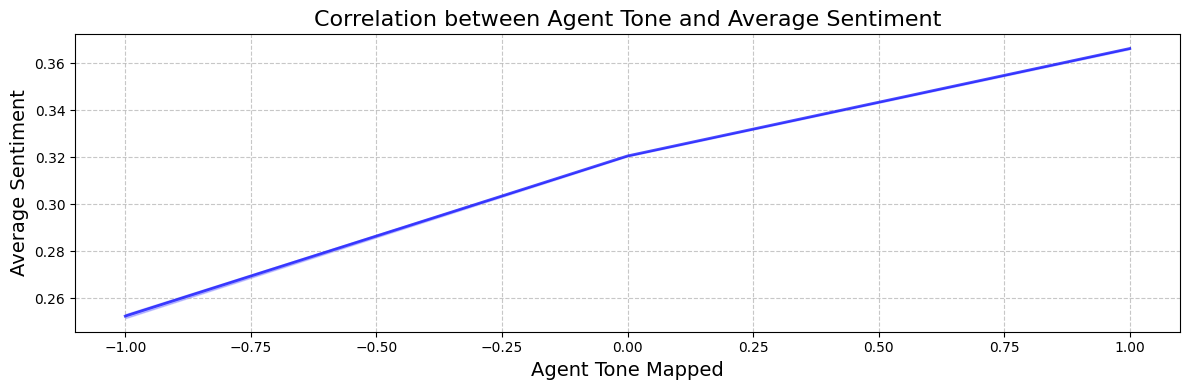

In [106]:
plt.figure(figsize=(12, 4))

final_sorted = final.sort_values(by='agent_tone_mapped')

sns.lineplot(data=final_sorted, x='agent_tone_mapped', y='average_sentiment', 
             color='blue', lw=2, linestyle='-', alpha=0.7)

plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Correlation between Agent Tone and Average Sentiment', fontsize=16)
plt.xlabel('Agent Tone Mapped', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)

plt.tight_layout()
plt.savefig('Correlation_between_Agent_Tone_and_Average_Sentiment.jpg')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


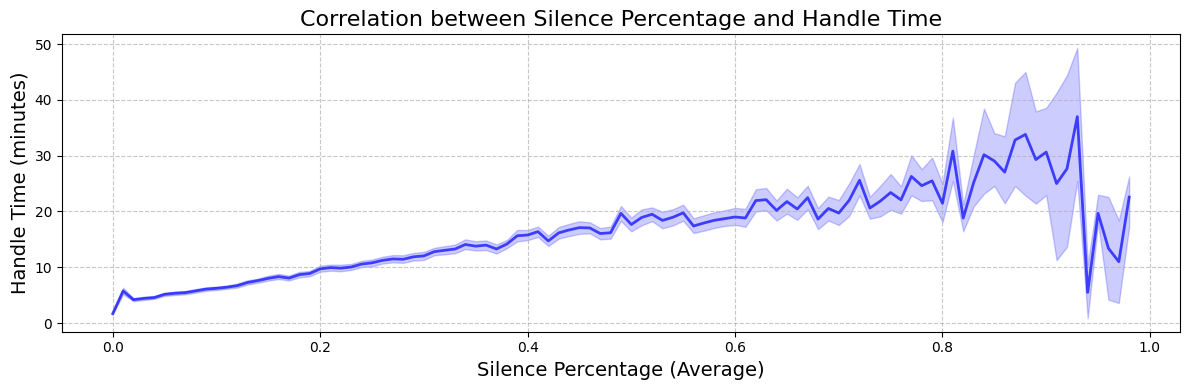

In [107]:
plt.figure(figsize=(12, 4))

final_sorted = final.sort_values(by='silence_percent_average')

sns.lineplot(data=final_sorted, x='silence_percent_average', y='handle_time', 
             color='blue', lw=2, linestyle='-', alpha=0.7)

plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Correlation between Silence Percentage and Handle Time', fontsize=16)
plt.xlabel('Silence Percentage (Average)', fontsize=14)
plt.ylabel('Handle Time (minutes)', fontsize=14)

plt.tight_layout()
plt.savefig('Correlation_between_Silence_and_Handle_Time_Fluctuations.jpg')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


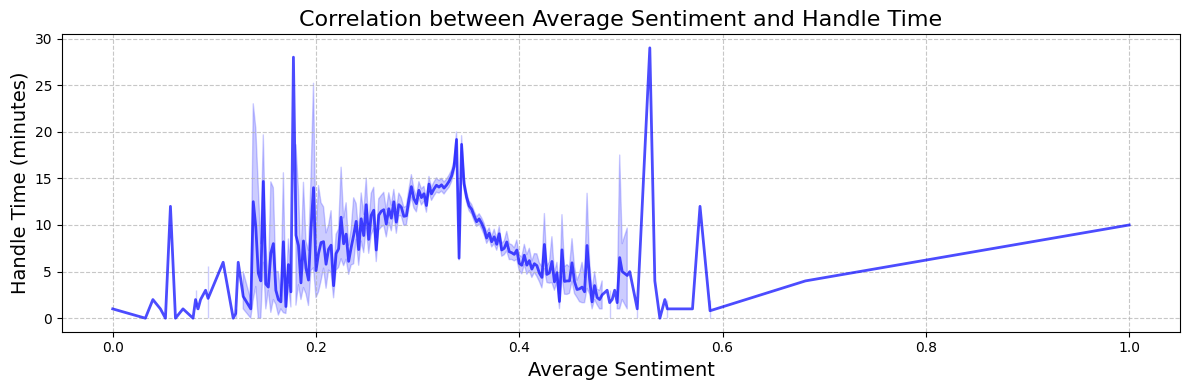

In [111]:
final_sorted = final.sort_values(by='average_sentiment')

plt.figure(figsize=(12, 4))

# Create a line plot for average sentiment vs. handle time
sns.lineplot(data=final_sorted, x='average_sentiment', y='handle_time', 
             color='blue', lw=2, linestyle='-', alpha=0.7)

plt.grid(True, linestyle='--', alpha=0.7)

# Set title and labels
plt.title('Correlation between Average Sentiment and Handle Time', fontsize=16)
plt.xlabel('Average Sentiment', fontsize=14)
plt.ylabel('Handle Time (minutes)', fontsize=14)

plt.tight_layout()
plt.savefig('Correlation_between_Average_Sentiment_and_Handle_Time_Fluctuations.jpg')
plt.show()


## ---------------------------------------------------------------------------------------------------